# Advanced Lane Finding Project
## The goals / steps of this project are the following:
* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
* **Apply a distortion correction to raw images.**
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
___________________

## Imports

In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle

%matplotlib inline

## Goal 1: Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

### Plot one image and evaluate it's characteristics

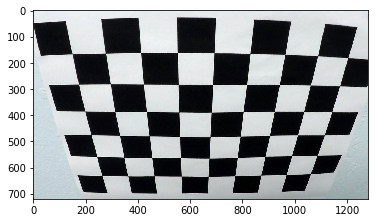

In [66]:
name = 'camera_cal/calibration2.jpg'
img = cv2.imread(name)
plt.imshow(img)

Here I can see nx = 9 and ny = 6

In [67]:
nx = 9
ny = 6

Taking inspiration from https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb for camera callibration.

Detecting corners in chessboards

In [77]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
#         write_name = 'corners_found'+str(idx)+'.jpg'
#         cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)
        
cv2.destroyAllWindows()

Using the corners detected from chessboards and using that to calliberate camera

I am showcasing a case that failed while corner detection and also saving the calibration result at **camera_cal/wide_dist_pickle.p**

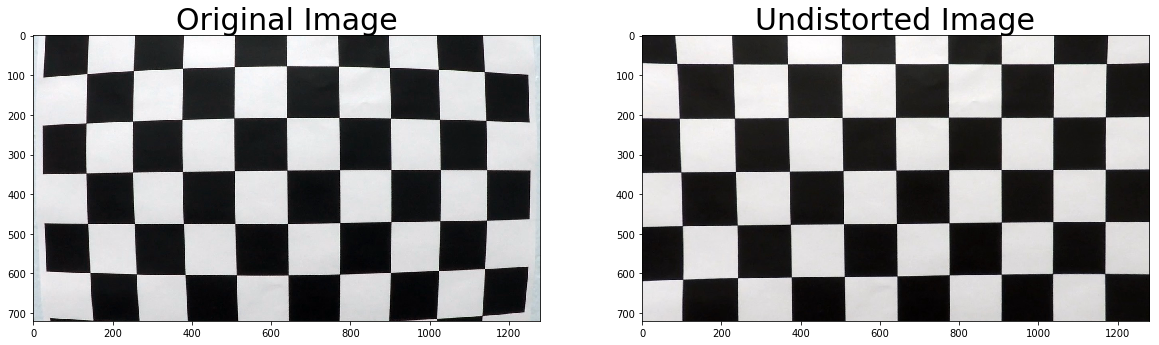

In [79]:
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
# cv2.imwrite('camera_cal/calibration1_undistorted.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Goal 2: Apply a distortion correction to raw images.


In [106]:
# Given an image, it undistorts an image from memory loaded mtx and dist
def undistort(img):
    img_size = (img.shape[1], img.shape[0])
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

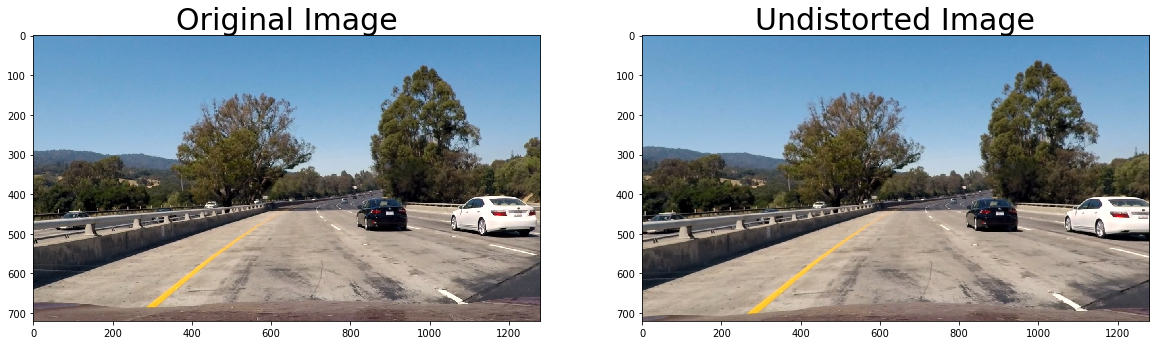

In [107]:
img = cv2.imread('test_images/test1.jpg')
dst = undistort(img)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Now storing undistored images to **output_images** folder

In [108]:
images = glob.glob('test_images/*')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = undistort(img)
    cv2.imwrite('output_images/undistorted/' + fname.split('/')[1], dst)